In [1]:
#Google Drive Mount
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Library Import
from sklearn.datasets import make_blobs

import os
import pandas as pd
import numpy as np
import math
import scipy as sp
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt 
from warnings import filterwarnings
filterwarnings('ignore')
%matplotlib inline

from keras.models import Sequential,Model
from sklearn.svm import SVC 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

import torch
import torch.nn as nn 

*`•`* Task 1: Implement data load 
function for fixed length (10 points)

In [3]:
data=pd.read_csv('/content/drive/MyDrive/21-2빅데이터보안/train.csv')
datas=pd.DataFrame(data.iloc[:,0:])
data.columns=list(data.iloc[:,0:].columns)
datas['class']=data['class']
data_drop=datas.drop('class',axis=1)

Xf=data_drop.values
Yf=datas['class'] #.map({'M":1, "B":0})

print(Xf)
print('\n\n')
print(Yf)

[[-1. -1. -1. ... -1. 40. 24.]
 [-1. -1.  1. ... -1. -1. -1.]
 [-1. -1.  1. ... -1. -1. -1.]
 ...
 [ 1. -1. -1. ... -1. -1. -1.]
 [-1. -1. -1. ... -1. -1. -1.]
 [-1. -1. -1. ... -1. -1. -1.]]



0       0
1       0
2       0
3       0
4       0
       ..
6386    1
6387    1
6388    1
6389    1
6390    1
Name: class, Length: 6391, dtype: int64


* Task 2: Implement data load function for variable length (25 points)

In [ ]:
import glob
file_list = sorted(glob.glob('/content/drive/MyDrive/21-2빅데이터보안/data/*.csv'))

#'Malicious:1' 150 files, 'Benign:0' 150 files
print(len(file_list))

300


In [ ]:
path = '/content/drive/MyDrive/21-2빅데이터보안/data'

#Add a list of file names to file_label
file_list = os.listdir(path)
file_labels = [file for file in file_list]
print(file_labels)

In [ ]:
#Add a label for files to Y
#Malicious:1, Benign:0
Y = []

for i in range(300):
  if file_list[i].startswith('0'):
    Y.append(0)
  else:
    Y.append(1)

In [ ]:
print(Y)
print(len(Y))

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
300


In [ ]:
#Add a file data to files
#Receive files as 2D, convert it back into 1D, and add it to the files array.
files = []

for i in range(300):
    a = pd.read_csv(path+'/'+file_labels[i], encoding='cp1252')
    a_2d = a.to_numpy()
    a_1d = a_2d.flatten()
    files.append(a_1d)
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [ ]:
from keras.preprocessing.sequence import pad_sequences
from keras import backend as K

#Padding -1 based on the length of the longest file
padded_files = pad_sequences(files, value=-1)

print(padded_files)
padded_files.shape

[[-1 -1 -1 ...  0  0  0]
 [-1 -1 -1 ...  0  0  0]
 [-1 -1 -1 ...  0  0  0]
 ...
 [-1 -1 -1 ...  0  0  0]
 [-1 -1 -1 ...  0  0  0]
 [-1 -1 -1 ...  0  0  0]]


(300, 1142761)

In [ ]:
X = np.array(padded_files)
Y = np.array(Y)

print(X.shape)
print(Y.shape)

• Task 3: Implement K-means clustering or any ML algorithms (25 points)


In [4]:
#data with Fixed length
#K-Means Clustering
x_trainK, x_testK, y_trainK, y_testK = train_test_split(Xf, Yf, test_size = 0.1, random_state=99)

k_means=KMeans(n_clusters=2)
k_means.fit(x_trainK)
predictK=k_means.predict(x_testK)
scoreK=accuracy_score(y_testK, predictK)
print('k_means clustering prediction score: %s' % scoreK)


k_means clustering prediction score: 0.6046875


In [ ]:
#data with Variable length
#K-Means Clustering
x_trainK, x_testK, y_trainK, y_testK = train_test_split(X, Y, test_size = 0.1, random_state=42)

k_means=KMeans(n_clusters=2)
k_means.fit(x_trainK)
predictK=k_means.predict(x_testK)
scoreK=accuracy_score(y_testK, predictK)
print('k_means clustering prediction score: %s' % scoreK)


k_means clustering prediction score: 0.6666666666666666


In [5]:
#data with Fixed length
#SVM 
x_trainSVC, x_testSVC, y_trainSVC, y_testSVC = train_test_split(Xf, Yf, test_size = 0.1, random_state=99)

clfSVC=Sequential()
clfSVC=SVC(gamma='auto')
clfSVC.fit(x_trainSVC, y_trainSVC)
predictSVC = clfSVC.predict(x_testSVC)
scoreSVC = accuracy_score(y_testSVC, predictSVC)
print('svm prediction score: %s' % scoreSVC)

svm prediction score: 0.9078125


In [ ]:
#data with Variable length
#SVM
x_trainSVC2, x_testSVC2, y_trainSVC2, y_testSVC2 = train_test_split(X, Y, test_size = 0.1, random_state=99)

clfSVC2=Sequential()
clfSVC2=SVC(gamma='auto')
clfSVC2.fit(x_trainSVC2, y_trainSVC2)
predictSVC2 = clfSVC2.predict(x_testSVC2)
scoreSVC2 = accuracy_score(y_testSVC2, predictSVC2)
print('svm prediction score: %s' % scoreSVC2)

svm prediction score: 0.98


In [6]:
#data with Fixed length
#Logistic Regression
x_trainLog, x_testLog, y_trainLog, y_testLog = train_test_split(Xf, Yf, test_size = 0.1, random_state=99)

clfLog=Sequential()
clfLog=LogisticRegression()
clfLog.fit(x_trainLog, y_trainLog)
predictLog = clfLog.predict(x_testLog)
scoreLog = accuracy_score(y_testLog, predictLog)
print('LogisticRegression prediction score: %s' % scoreLog)

LogisticRegression prediction score: 0.9890625


In [ ]:
#data with Variable length
#Logistic Regression
x_trainLog2, x_testLog2, y_trainLog2, y_testLog2 = train_test_split(X, Y, test_size = 0.1, random_state=99)

clfLog2=Sequential()
clfLog2=LogisticRegression()
clfLog2.fit(x_trainLog2, y_trainLog2)
predictLog2 = clfLog2.predict(x_testLog2)
scoreLog2 = accuracy_score(y_testLog2, predictLog2)
print('LogisticRegression prediction score: %s' % scoreLog2)

LogisticRegression prediction score: 1.0


In [7]:
#data with Fixed length
#RandomForest Classifier
x_trainRdf, x_testRdf, y_trainRdf, y_testRdf = train_test_split(Xf, Yf, test_size = 0.1, random_state=99)

clfRdf=Sequential()
clfRdf=RandomForestClassifier()
clfRdf.fit(x_trainRdf, y_trainRdf)
predictRdf = clfRdf.predict(x_testRdf)
scoreRdf = accuracy_score(y_testRdf, predictRdf)
print('RandomForestClassifier prediction score: %s' % scoreRdf)

RandomForestClassifier prediction score: 1.0


In [ ]:
#data with Variable length
#RandomForest Classifier
x_trainRdf2, x_testRdf2, y_trainRdf2, y_testRdf2 = train_test_split(X, Y, test_size = 0.1, random_state=99)

clfRdf2=Sequential()
clfRdf2=RandomForestClassifier()
clfRdf2.fit(x_trainRdf2, y_trainRdf2)
predictRdf2 = clfRdf2.predict(x_testRdf2)
scoreRdf2 = accuracy_score(y_testRdf2, predictRdf2)
print('RandomForestClassifier prediction score: %s' % scoreRdf2)

RandomForestClassifier prediction score: 1.0


• Task 4: Visualize clustering or hidden representation of ML algorithm results (20 points)

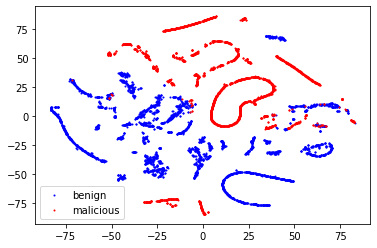

In [8]:
#data with Fixed length
#TSNE
tsne = TSNE(n_components=2,random_state=10,learning_rate=100,perplexity=30)
Xf_2d=tsne.fit_transform(Xf)
for i,c,l in zip([0,1],['b','r'],['benign','malicious']):
  plt.scatter(Xf_2d[Yf==i,0],Xf_2d[Yf==i,1],c=c,label=l,s=1)
  #Convert x value with (Y==0) to x, y value with (Y==0) to y
  #Convert x value with (Y==1) to x, y value with (Y==1) to y

plt.legend()
plt.show()

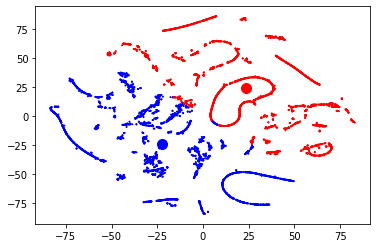

In [11]:
#data with Fixed length
#K-Means Clustering
dataK=pd.DataFrame.copy(data)
Xf_2d2=Xf_2d

dataK['cluster'] = k_means.fit_predict(Xf_2d2)

plt.scatter(Xf_2d2[:,0], Xf_2d2[:,1], c=dataK.cluster.map({0:'b', 1:'r'}),s=1)
plt.scatter(k_means.cluster_centers_[0, 0], k_means.cluster_centers_[0, 1], s=100, c='b')
plt.scatter(k_means.cluster_centers_[1, 0], k_means.cluster_centers_[1, 1], s=100, c='r')

plt.show()

In [12]:
print(data)
print(dataK)

print(Xf)
print(Xf_2d)
print(Xf_2d2)

      class  1    2  3  4  5     6  ...  291  292  293  294  295   296   297
0         0 -1 -1.0 -1 -1  1 -1.00  ...   -1   -1   -1 -1.0   -1  40.0  24.0
1         0 -1 -1.0  1 -1 -1 -1.00  ...   -1   -1   -1 -1.0   -1  -1.0  -1.0
2         0 -1 -1.0  1 -1 -1  0.02  ...   -1   -1   -1 -1.0   -1  -1.0  -1.0
3         0 -1  0.0 -1 -1 -1 -1.00  ...   -1   -1   -1 -1.0   -1  -1.0  -1.0
4         0 -1 -1.0 -1 -1 -1 -1.00  ...   -1   -1   -1 -1.0   -1  -1.0  -1.0
...     ... ..  ... .. .. ..   ...  ...  ...  ...  ...  ...  ...   ...   ...
6386      1 -1 -1.0 -1 -1 -1 -1.00  ...   -1   -1    1 -1.0   -1  -1.0  -1.0
6387      1 -1 -1.0 -1 -1 -1 -1.00  ...   -1   -1   -1 -1.0   -1  -1.0  -1.0
6388      1  1 -1.0 -1 -1 -1 -1.00  ...   -1   -1    1 -1.0   -1  -1.0  -1.0
6389      1 -1 -1.0 -1 -1 -1 -1.00  ...   -1   -1    1 -1.0   -1  -1.0  -1.0
6390      1 -1 -1.0 -1 -1 -1 -1.00  ...   -1   -1   -1 -1.0   -1  -1.0  -1.0

[6391 rows x 298 columns]
      class  1    2  3  4  5     6  ...  292  293

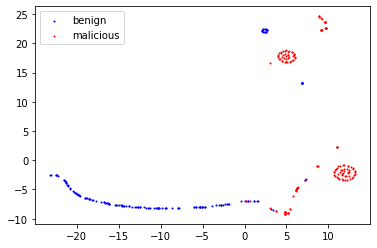

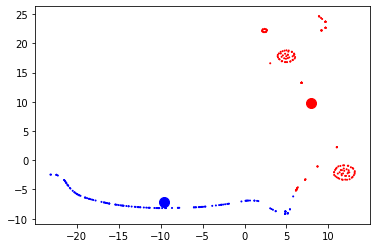

     0        1        2        3        ...  1142757  1142758  1142759  1142760
0         -1       -1       -1       -1  ...        0        0        0        0
1         -1       -1       -1       -1  ...        0        0        0        0
2         -1       -1       -1       -1  ...        0        0        0        0
3         -1       -1       -1       -1  ...        0        0        0        0
4         -1       -1       -1       -1  ...        0        0        0        0
..       ...      ...      ...      ...  ...      ...      ...      ...      ...
295       -1       -1       -1       -1  ...        0        0        0        0
296       -1       -1       -1       -1  ...        0        0        0        0
297       -1       -1       -1       -1  ...        0        0        0        0
298       -1       -1       -1       -1  ...        0        0        0        0
299       -1       -1       -1       -1  ...        0        0        0        0

[300 rows x 1142761 columns

In [ ]:
#data with Variable length
#TSNE
tsne = TSNE(n_components=2,random_state=10,learning_rate=100,perplexity=30)
X_2d2=tsne.fit_transform(X)
for i,c,l in zip([0,1],['b','r'],['benign','malicious']):
  plt.scatter(X_2d2[Y==i,0],X_2d2[Y==i,1],c=c,label=l,s=1)
  #Convert x value with (Y==0) to x, y value with (Y==0) to y
  #Convert x value with (Y==1) to x, y value with (Y==1) to y

plt.legend()
plt.show()

#data with Variable length
#K-Means Clustering
data_df = pd.DataFrame(padded_files) 
dataK2=pd.DataFrame.copy(data_df)
X_2dd2=X_2d2

dataK2['cluster'] = k_means.fit_predict(X_2dd2)

plt.scatter(X_2dd2[:,0], X_2dd2[:,1], c=dataK2.cluster.map({0:'b', 1:'r'}),s=1)
plt.scatter(k_means.cluster_centers_[0, 0], k_means.cluster_centers_[0, 1], s=100, c='b')
plt.scatter(k_means.cluster_centers_[1, 0], k_means.cluster_centers_[1, 1], s=100, c='r')

plt.show()
print(data_df)
print(dataK2)